In [16]:
import pandas as pd

data = pd.read_csv('cleaned_data_selected_columns.csv', encoding='latin1')

In [17]:
data.columns

Index(['Unnamed: 0', 'Date', 'T', 'A', 'S', 'M', 'Weigh_Feeder_rate_ A(TPH)',
       'Weigh_feeder_rate_B(TPH)', 'Ball_mill_amps',
       'MILL_FEED_END_BRNG_TEMP(Â°C)',
       ...
       'M- (420 Â 355 microns)', 'M- (355 Â 212 microns)',
       'M- (212 Â 150 microns)', 'M- (150 Â 75 microns)',
       'M- (< 75 microns)', 'M- (Bulk Density Kg/Cft)', '> 35', '35 to 200',
       '< 200', 'combinations'],
      dtype='object', length=135)

In [18]:
# features = ['Weigh_Feeder_rate_ A(TPH)','Weigh_feeder_rate_B(TPH)','Ball_mill_amps','MILL_FEED_END_BRNG_TEMP(Â°C)',
# 'MILL_DISCH_END_BRNG_TEMP(Â°C)','PINION_DE_BRNG_TEMP(Â°C)','MILL_FEED_END_BRNG_TEMP(Â°C)','MILL_DISCH_END_BRNG_TEMP(Â°C)',
# 'PINION_NDE_BRNG_TEMP(Â°C)','BALL_MILL_VENT_SYS_TEMP(Â°C)','BALL_MILL_VENT_FAN_AMPS','SCREW_CONV _ AMPS(Ball mill Outlet)','GR_Silo_level(%)','Ball_mill_stack_SPM','Plant_air_pressure(kg/cm2)','BAG_FLTR_SUC_PRESSURE(mmWC)',
# 'FAN_SUC_PRESSURE(mmWC)','BAG_FILTER_DP(mmWC)','GRS_AIR_SLIDE_BLWR_CURRENT_AMPS','BALL_MILL_AIRSLIDE_BLWR _AMPS',
# 'BALL_MILL_VIBRATION_A(mm/s)','BALL_MILL_VIBRATION_B(mm/s)','BALL_MILL_VIBRATION_C(mm/s)','BALL_MILL_VIBRATION_D(mm/s)',
# 'BALL_MILL_WND_TEMP_B(Â°C)','BALL_MILL_WND_TEMP_C(Â°C)','BALL_MILL_WND_TEMP_D(Â°C)','BALL_MILL_WND_TEMP_E(Â°C)','BALL_MILL_WND_TEMP_F(Â°C)',
# 'HP_LUBR_OIL_PRESSURE_1 (kg/cm2)','HP_LUBR_OIL_PRESSURE_2(kg/cm2)','MAIN_GEARBOX_LUBE_OIL_PRESSURE(kg/cm2)','LUBR_OIL_RESV_LVL(%)',
# 'LUBR_OIL_RESV_TEMP(Â°C)','SCREW_CONV _ CURRENT(Amps)','BUCKET_ELEVATOR_CURRENT(Amps)',]

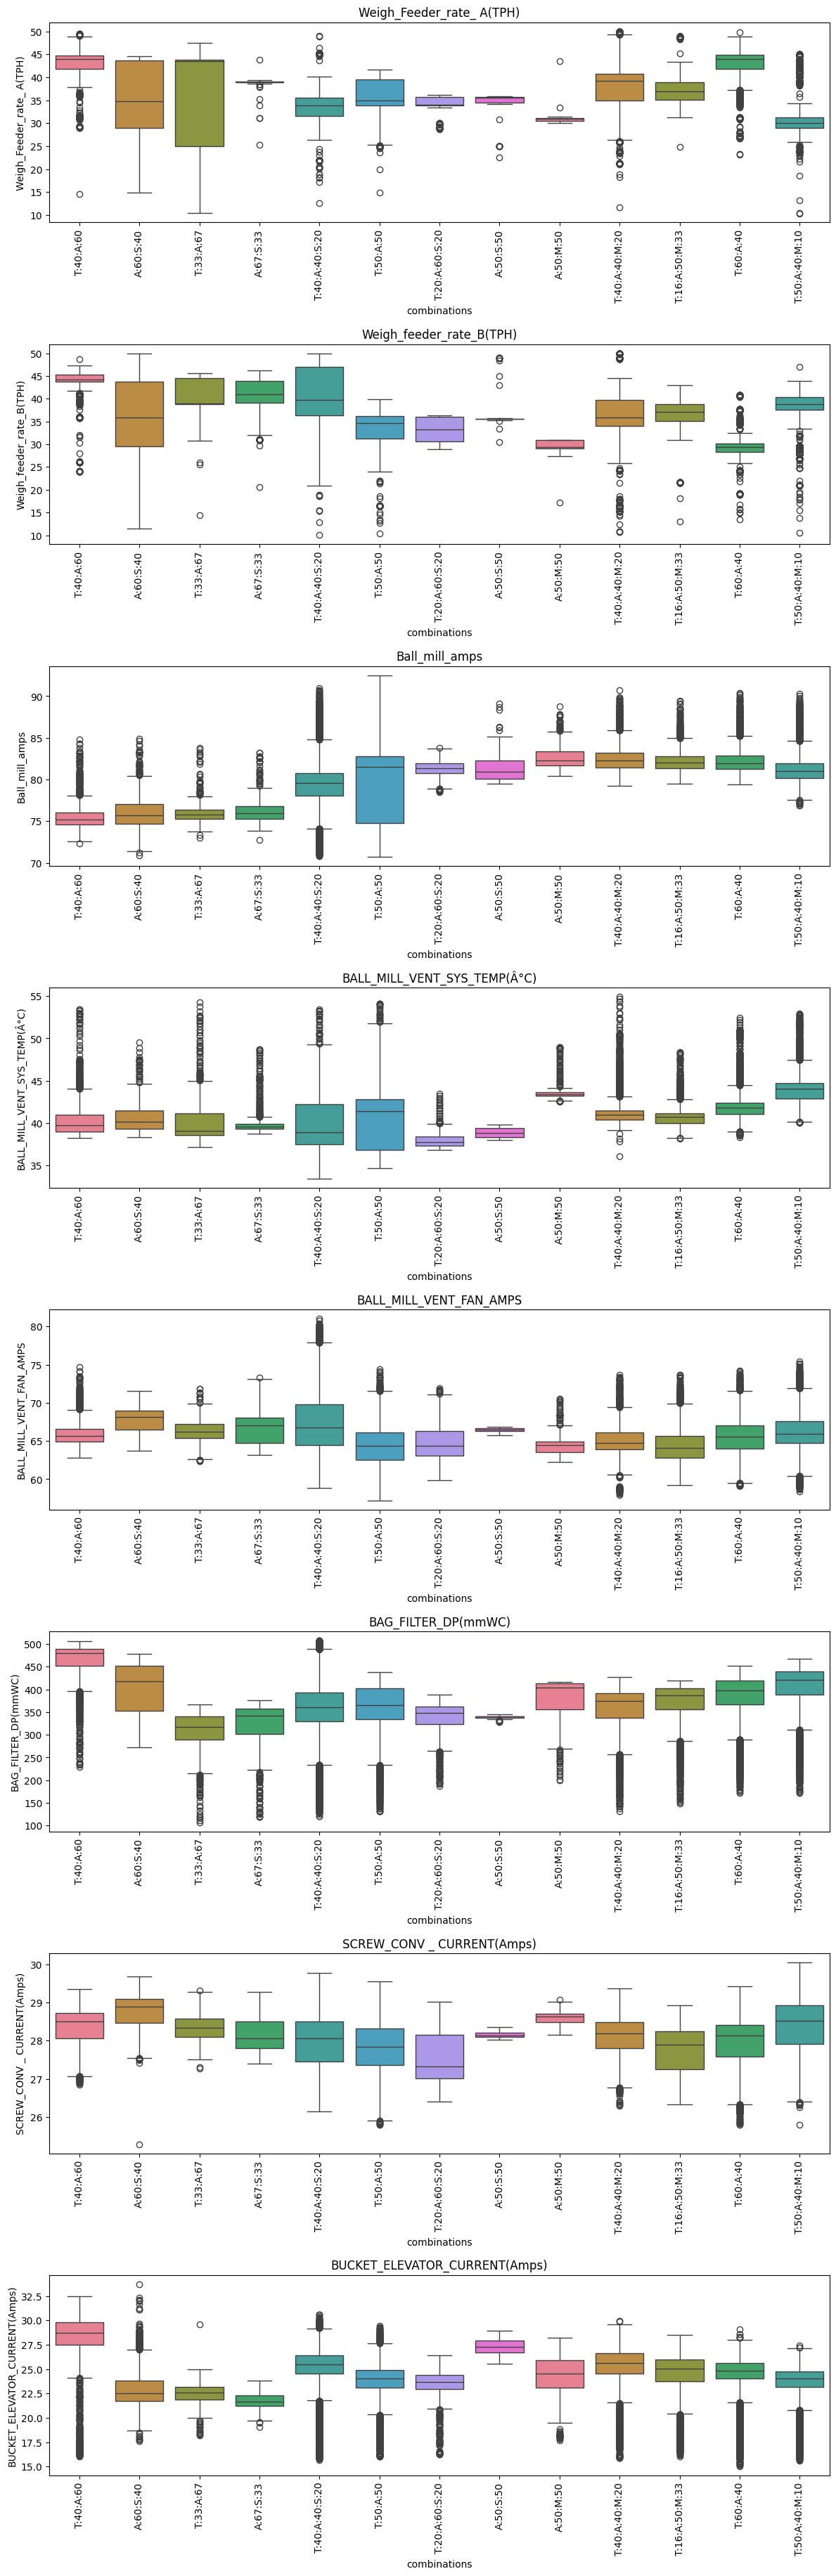

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

features = ['Weigh_Feeder_rate_ A(TPH)', 'Weigh_feeder_rate_B(TPH)', 'Ball_mill_amps',
            'BALL_MILL_VENT_SYS_TEMP(Â°C)','BALL_MILL_VENT_FAN_AMPS', 'BAG_FILTER_DP(mmWC)',
            'SCREW_CONV _ CURRENT(Amps)','BUCKET_ELEVATOR_CURRENT(Amps)']

# Define a custom color palette with 8 distinct colors
palette = sns.color_palette("husl", 8)

plt.figure(figsize=(12, 40))

z = 1
for i in range(len(features)):
    plt.subplot(9, 1, z)
    sns.boxplot(x='combinations', y=features[i], data=data, palette=palette)
    plt.title(features[i])
    plt.xticks(rotation=90)
    z += 1

plt.tight_layout()
plt.show()

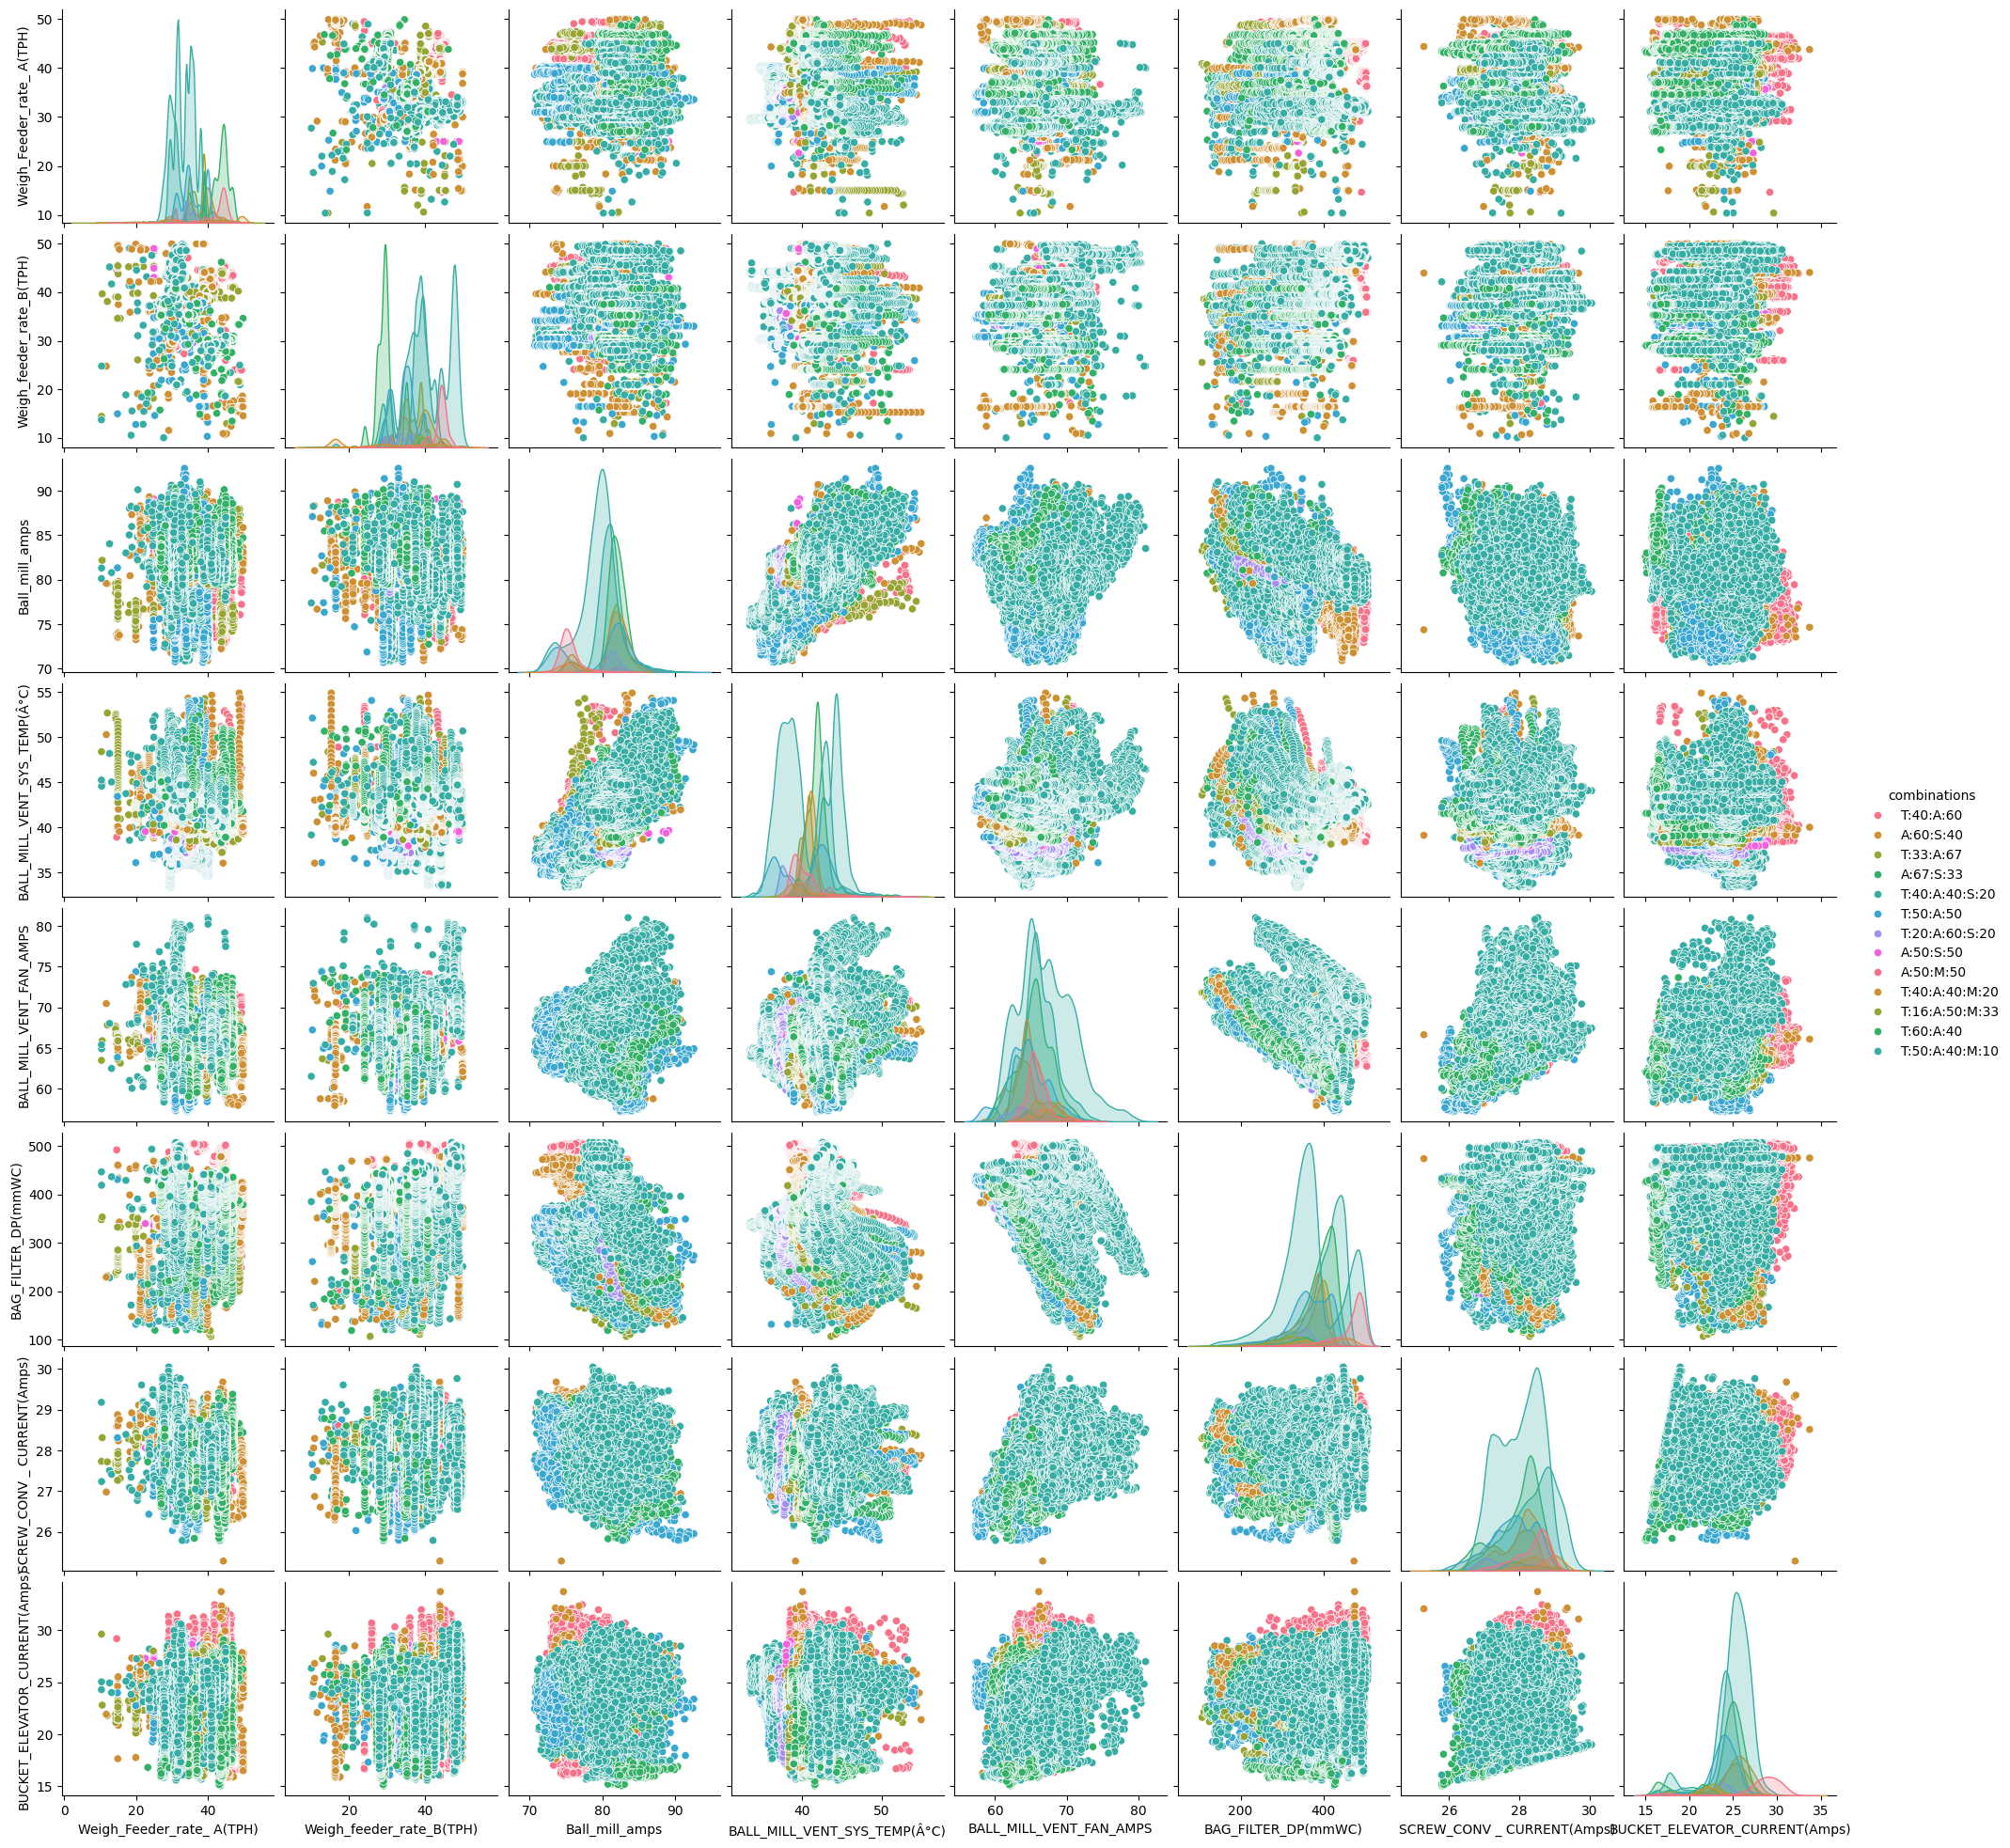

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Define a custom color palette with 8 distinct colors
palette = sns.color_palette("husl", 8)

# Visualize pairplot for each combination
sns.pairplot(data, vars=features, hue='combinations', palette=palette)
plt.show()


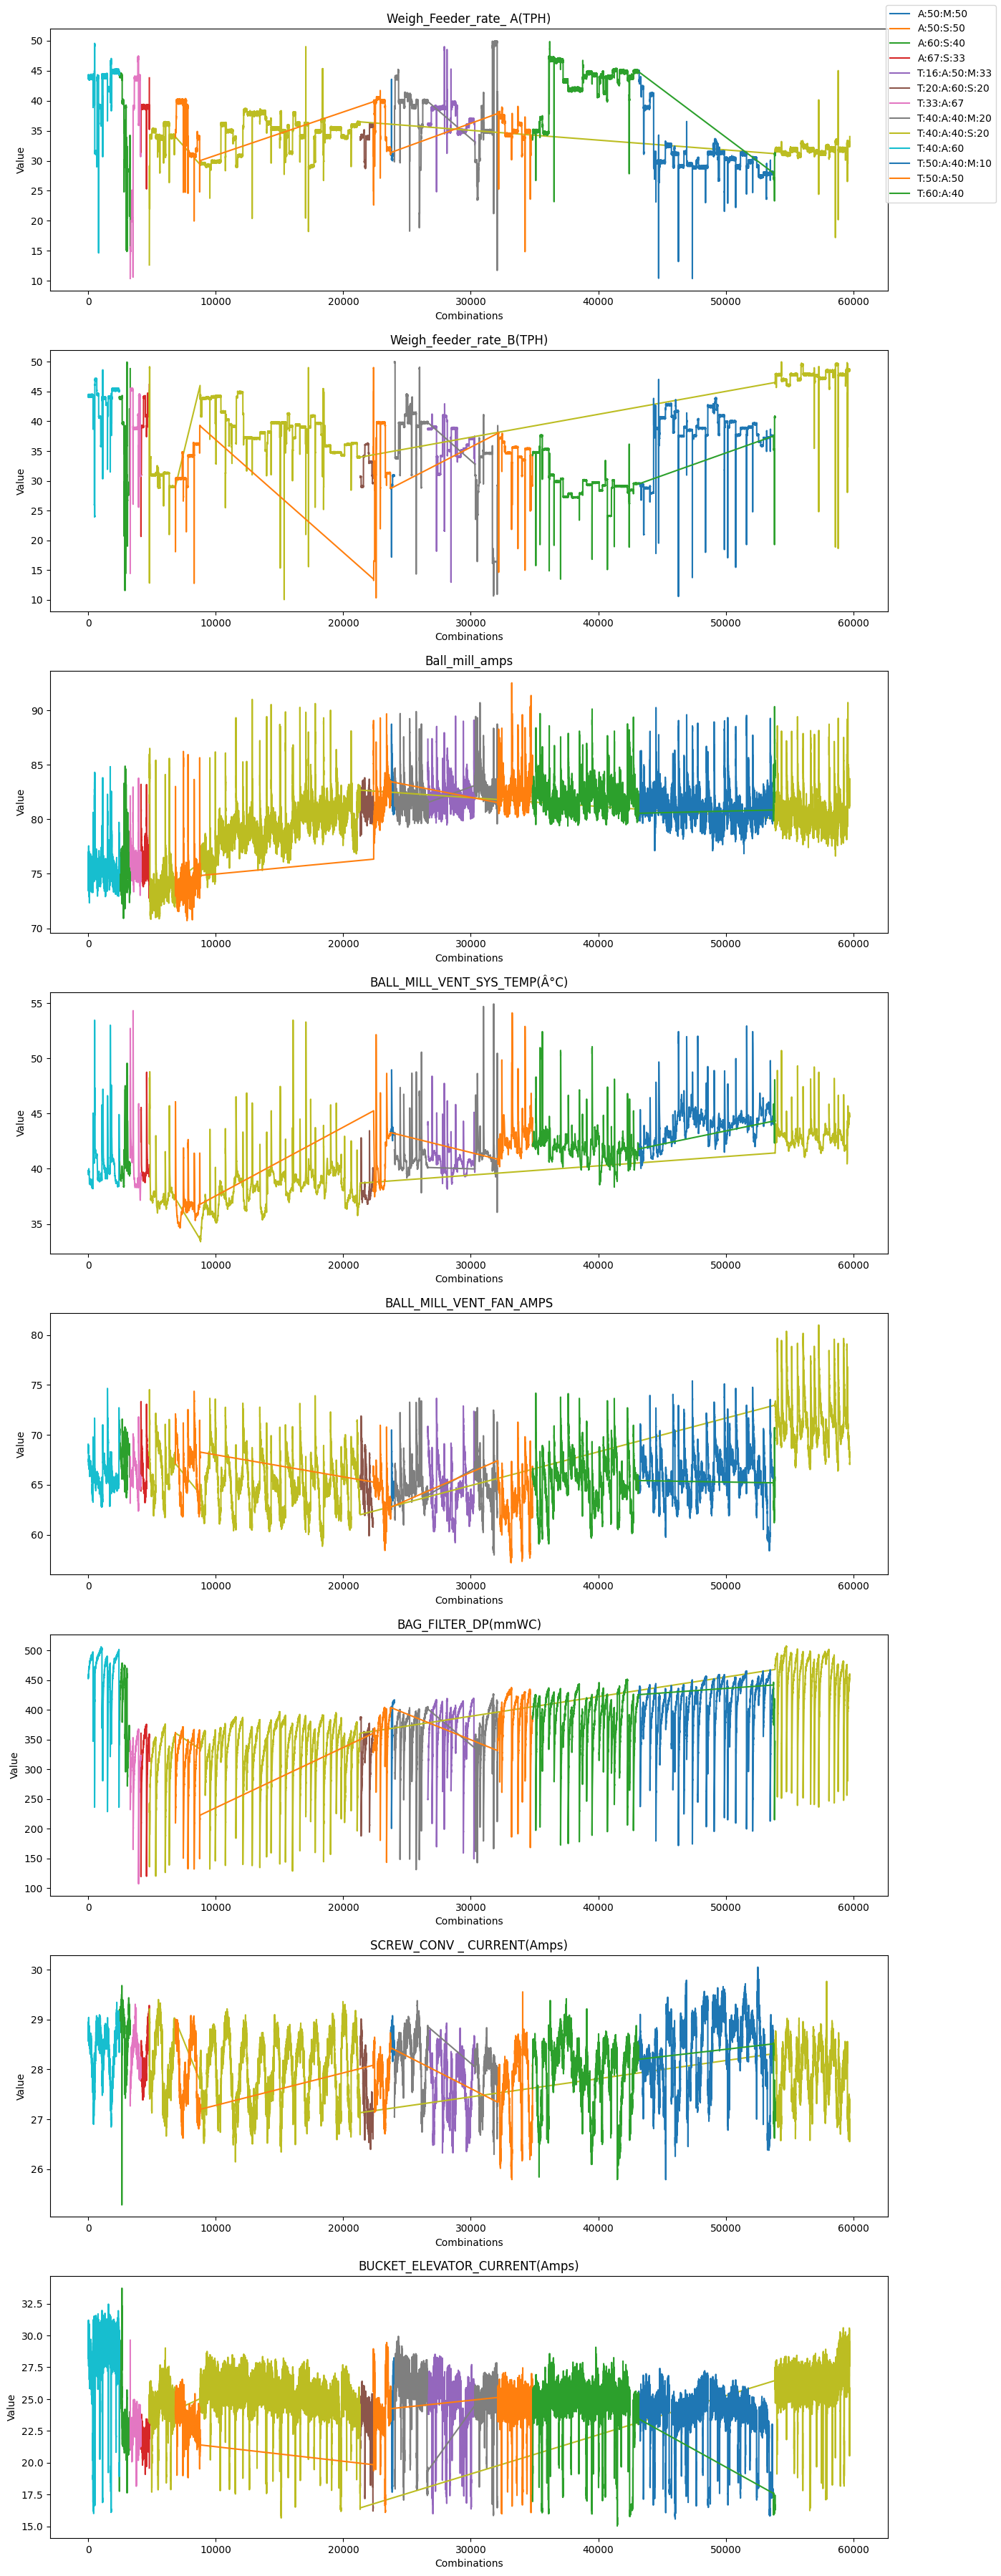

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Assuming 'Combinations' is a column in your dataset that indicates different groups

# Create a figure with subplots
plt.figure(figsize=(14, 36))  # Increased height for better clarity

# Initialize lists to collect lines and labels for the legend
lines = []
labels = []

# Plot each feature
for index, feature in enumerate(features):
    plt.subplot(len(features), 1, index + 1)
    # Iterate over unique combinations and plot lines
    for combination, group_data in data.groupby('combinations'):
        line, = plt.plot(group_data.index, group_data[feature], label=combination)
        if index == 0:  # Collect lines and labels from the first plot only
            lines.append(line)
            labels.append(combination)
    plt.title(feature)
    plt.xlabel('Combinations')
    plt.ylabel('Value')

# Add a single legend for all subplots
plt.figlegend(lines, labels, loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the legend
plt.show()
